# Sobre o Dataset
O Dataset contém as estatísticas dos 10 primeiros minutos de partidas do jogo League of Legends. As partidas são de alto nível, com jogadores no nível Diamente e Mestre (profissional).

O Dataset contém apenas dados numéricos e não apresenta dados ausentes.

## 1. Coletar Dados e Importar Bibliotecas

In [291]:
# Importando Bibliotecas:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy import log10
from numpy import abs
from scipy import stats
from sklearn.covariance import EllipticEnvelope
from sklearn.ensemble import IsolationForest
import seaborn as sns

df = pd.read_csv("https://raw.githubusercontent.com/AndrelsOliveira/PES_Ciencia_Dados/main/high_diamond_ranked_10min.csv")

## 2. Pré-processamento dos Dados

### 2.0 Inclusão de coluna para facilitar a análise e Selecionando a coluna de Índice

In [292]:
# Adicionar a coluna que indica o vencedor da partida
# Utilizando a função MAP para criar um coluna do tipo OBJETCT (será alterado mais tarde)
df['vencedor'] = list(map(lambda x: 'Azul' if x == 1 else 'Vermelho', df['blueWins']))

# Usar a coluna gameId como Índice
df = df.set_index('gameId')
df.head()

,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,...,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin,vencedor
gameId,,,,,,,,,,,,,,,,,,,,,
4519157822,0,28,2,1,9,6,11,0,0,0,...,16567,6.8,17047,197,55,-643,8,19.7,1656.7,Vermelho
4523371949,0,12,1,0,5,5,5,0,0,0,...,17620,6.8,17438,240,52,2908,1173,24.0,1762.0,Vermelho
4521474530,0,15,0,0,7,11,4,1,1,0,...,17285,6.8,17254,203,28,1172,1033,20.3,1728.5,Vermelho
4524384067,0,43,1,0,4,5,5,1,0,1,...,16478,7.0,17961,235,47,1321,7,23.5,1647.8,Vermelho
4436033771,0,75,4,0,6,6,6,0,0,0,...,17404,7.0,18313,225,67,1004,-230,22.5,1740.4,Vermelho


### 2.1 Definição de tipos

In [293]:
# Transformando a coluna 'vencedor' para o tipo categoria
df['vencedor'] = df['vencedor'].astype('category')
df['vencedor'] = df['vencedor'].cat.codes

# Utilizando o comando dtypes para verificar
df.dtypes

blueWins                          int64
blueWardsPlaced                   int64
blueWardsDestroyed                int64
blueFirstBlood                    int64
blueKills                         int64
blueDeaths                        int64
blueAssists                       int64
blueEliteMonsters                 int64
blueDragons                       int64
blueHeralds                       int64
blueTowersDestroyed               int64
blueTotalGold                     int64
blueAvgLevel                    float64
blueTotalExperience               int64
blueTotalMinionsKilled            int64
blueTotalJungleMinionsKilled      int64
blueGoldDiff                      int64
blueExperienceDiff                int64
blueCSPerMin                    float64
blueGoldPerMin                  float64
redWardsPlaced                    int64
redWardsDestroyed                 int64
redFirstBlood                     int64
redKills                          int64
redDeaths                         int64


### 2.2 Tratamento de Dados Ausentes



In [294]:
# Verificando a quantidade de valores nulos em cada coluna
print(df.isnull().sum())
# Embora não haja dados faltantes, o código abaixo irá eliminar linhas com valores ausentes:
df = df.dropna()

blueWins                        0
blueWardsPlaced                 0
blueWardsDestroyed              0
blueFirstBlood                  0
blueKills                       0
blueDeaths                      0
blueAssists                     0
blueEliteMonsters               0
blueDragons                     0
blueHeralds                     0
blueTowersDestroyed             0
blueTotalGold                   0
blueAvgLevel                    0
blueTotalExperience             0
blueTotalMinionsKilled          0
blueTotalJungleMinionsKilled    0
blueGoldDiff                    0
blueExperienceDiff              0
blueCSPerMin                    0
blueGoldPerMin                  0
redWardsPlaced                  0
redWardsDestroyed               0
redFirstBlood                   0
redKills                        0
redDeaths                       0
redAssists                      0
redEliteMonsters                0
redDragons                      0
redHeralds                      0
redTowersDestr

### 2.3 Normalização e discretização

In [295]:
# Antes de fazer a discretização é preciso normalizar os dados.
# Calculando a distância do dataset original:
dist = np.linalg.norm(df.values[1]-df.values[2])
print('Verificando o valor da distância antes de normalizar: ',dist)

# Criando uma cópia do dataset original e normalização utilizando Min-Max:
df_norm = (df - df.min()) / (df.max() - df.min())
dist_norm = np.linalg.norm(df_norm.values[1]-df_norm.values[2])
print('Verificando o valor da distância após normalizar (Min - Max): ',dist_norm)

# Criando uma cópia do dataset original e normalização entre -1 e 1:
df_norm11 = ((df - df.min()) / (df.max() - df.min())*2)-1
dist_norm11 = np.linalg.norm(df_norm11.values[1]-df_norm11.values[2])
print('Verificando o valor da distância após normalizar (-1 e 1): ',dist_norm11)

# Criando uma cópia do dataset original e normalização utilizando Desv Padrão:
df_norm_desv = (df - df.mean()) / (df.mean() - df.std())
dist_norm_desv = np.linalg.norm(df_norm_desv.values[1]-df_norm_desv.values[2])
print('Verificando o valor da distância após normalizar (Desv Pad): ',dist_norm_desv)

Verificando o valor da distância antes de normalizar:  2863.6568282529947
Verificando o valor da distância após normalizar (Min - Max):  2.2506809796695117
Verificando o valor da distância após normalizar (-1 e 1):  4.5013619593390235
Verificando o valor da distância após normalizar (Desv Pad):  43.73790046692896


In [296]:
# Discretizando as colunas redGoldDiff e blueGoldDiff (maiores valores de desvio padrão)
# Utilizando 4 Bins com mesmo intervalo (quartis)

df['redGoldDiff'] = pd.qcut(df['redGoldDiff'], 4)
df['blueGoldDiff'] = pd.qcut(df['blueGoldDiff'], 4)

df['redGoldDiff'].value_counts()
df['blueGoldDiff'].value_counts()


(-1585.5, 14.0]          2471
(-10830.001, -1585.5]    2470
(1596.0, 11467.0]        2470
(14.0, 1596.0]           2468
Name: blueGoldDiff, dtype: int64

### 2.4 Limpeza de Dados (univariado, bivariado	e multivariado)


#### 2.4.1 Univariado (z-Score Robusto)

In [297]:
# Não há dados duplicados
print(len(df))
df.drop_duplicates(keep= False, inplace=True)
print(len(df))

9879
9879


<Axes: >

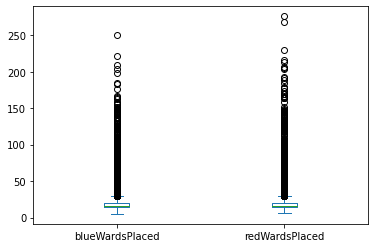

In [298]:
# Removendo outliers utilizando z-Score robusto (univariado)
# Visualizando o boxplot das colunas blueWardsPlaced e redWardsPlaced para visulizar outliers:
df[['blueWardsPlaced','redWardsPlaced']].plot.box()

array([[<Axes: title={'center': 'blueWardsPlaced'}>,
        <Axes: title={'center': 'redWardsPlaced'}>]], dtype=object)

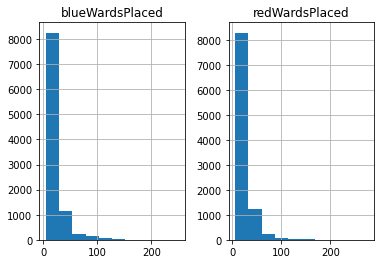

In [299]:
# Dados não normalizados (não são simétricos), necessário usar log para normalizar.
df[['blueWardsPlaced','redWardsPlaced']].hist()

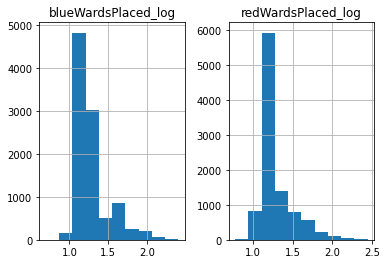

In [300]:
# Utilizando log para normalizar os dados e verificando novamente o hist
df['blueWardsPlaced_log'] = log10(df['blueWardsPlaced'])
df['redWardsPlaced_log'] = log10(df['redWardsPlaced'])
df[['blueWardsPlaced_log','redWardsPlaced_log']].hist()

# Reorganizando a ordem das colunas para facilitar a visualização dos próximos passos:
df = df[['vencedor', 'blueWardsPlaced_log', 'redWardsPlaced_log', 
       'blueWardsPlaced', 'redWardsPlaced', 'blueWins', 'blueWardsDestroyed',
       'blueFirstBlood', 'blueKills', 'blueDeaths', 'blueAssists', 'blueEliteMonsters',
       'blueDragons', 'blueHeralds', 'blueTowersDestroyed', 'blueTotalGold',
       'blueAvgLevel', 'blueTotalExperience', 'blueTotalMinionsKilled',
       'blueTotalJungleMinionsKilled', 'blueGoldDiff', 'blueExperienceDiff',
       'blueCSPerMin', 'blueGoldPerMin', 'redWardsDestroyed',
       'redFirstBlood', 'redKills', 'redDeaths', 'redAssists',
       'redEliteMonsters', 'redDragons', 'redHeralds', 'redTowersDestroyed',
       'redTotalGold', 'redAvgLevel', 'redTotalExperience',
       'redTotalMinionsKilled', 'redTotalJungleMinionsKilled', 'redGoldDiff',
       'redExperienceDiff', 'redCSPerMin', 'redGoldPerMin']]


In [301]:
# Calcular o MAD Manual
mad_blue = abs(df['blueWardsPlaced_log'] - df['blueWardsPlaced_log'].median()).median()*(1/0.6745)
print('MAD Manual blue: ',mad_blue)

mad_red = abs(df['redWardsPlaced_log'] - df['redWardsPlaced_log'].median()).median()*(1/0.6745)
print('MAD Manual red: ',mad_red)

# Calcular o MAD Automático:
print('MAD automático blue: ', df['blueWardsPlaced_log'].mad())
print('MAD automático red: ',df['redWardsPlaced_log'].mad())

# O valor do MAD automático é  igual para as duas colunas pq a media e mediana é igual.
# porém, utilizando o describe é possível ver que há diferença entre as colunas.

# De qualquer forma, a similaridade entre as duas colunas  faz sentido, pq os WARDS
# são utilizados de forma mt parecida pelos jogadores durante as partidas.

# POR CONTA SIMILARIDADE ENTRE AS COLUNAS, OS PRÓXIMOS GRÁFICOS SERÃO APENAS PARA A COLUNA 'blueWardsPlaced_log'

MAD Manual blue:  0.08597768269486558
MAD Manual red:  0.08597768269486558
MAD automático blue:  0.14800211579985942
MAD automático red:  0.14952394364082477


<Axes: >

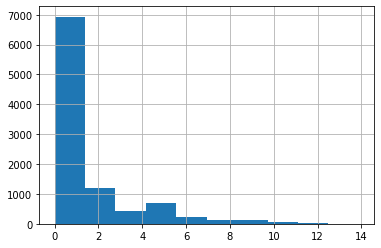

In [302]:
# Histograma do z-Score robusto Coluna BLUE
(abs(df['blueWardsPlaced_log']-df['blueWardsPlaced_log'].median())/mad_blue).hist()

In [303]:
print('Quantidade de registros que possuem Z-Score maior que 6: ',len(df[abs(df['blueWardsPlaced_log']-df['blueWardsPlaced_log'].median())/mad_blue > 6]), 'linhas')

# Visualizando o dados que possuem Z-Score maior que 6:
df[abs(df['blueWardsPlaced_log']-df['blueWardsPlaced_log'].median())/mad_blue > 6]

Quantidade de registros que possuem Z-Score maior que 6:  514 linhas


,vencedor,blueWardsPlaced_log,redWardsPlaced_log,blueWardsPlaced,redWardsPlaced,blueWins,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
gameId,,,,,,,,,,,,,,,,,,,,,
4436033771,1,1.875061,1.230449,75,17,0,4,0,6,6,...,0,17404,7.0,18313,225,67,"(-14.0, 1585.5]",-230,22.5,1740.4
4520898233,1,1.892095,1.176091,78,15,0,4,0,4,3,...,0,15500,7.0,17936,220,64,"(-1596.0, -14.0]",-1283,22.0,1550.0
4519148589,1,2.021189,1.812913,105,65,0,5,1,8,6,...,0,16154,6.8,17849,223,40,"(-1596.0, -14.0]",413,22.3,1615.4
4516919746,0,2.086360,1.146128,122,14,1,3,1,9,1,...,0,14336,6.4,16737,233,40,"(-11467.001, -1596.0]",-2922,23.3,1433.6
4515706467,1,1.919078,1.544068,83,35,0,13,1,7,11,...,0,19344,7.2,20509,216,59,"(1585.5, 10830.0]",4682,21.6,1934.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4501521847,0,1.954243,1.146128,90,14,1,3,1,13,5,...,0,14901,6.6,16101,175,43,"(-11467.001, -1596.0]",-1777,17.5,1490.1
4525312579,1,1.903090,1.361728,80,23,0,5,0,6,7,...,0,16913,7.2,19372,229,44,"(-14.0, 1585.5]",1564,22.9,1691.3
4527990640,0,1.929419,1.113943,85,13,1,3,0,8,7,...,0,17789,7.2,19039,218,58,"(-14.0, 1585.5]",-966,21.8,1778.9


#### 2.4.2 Univariado (Método Turkey)

In [304]:
#### Univariado (Método Turkey) - COLUNA redWardsPlaced_log

## COLUNA redWardsPlaced_log FOI FOI NORMALIZADA ACIMA.

# Calculando os quartis
q1 = df['redWardsPlaced_log'].quantile(q=0.25)
q3 = df['redWardsPlaced_log'].quantile(q=0.75)
iqr = q3 - q1
print(iqr)

print('Quantidade de registros valores abaixo do ideal (outliers negativos): ',len(df[df['redWardsPlaced_log'] < (q1-1.5*iqr)] ), 'linhas')

df[df['redWardsPlaced_log'] < (q1-1.5*iqr)] 

0.1549019599857433
Quantidade de registros valores abaixo do ideal (outliers negativos):  16 linhas


,vencedor,blueWardsPlaced_log,redWardsPlaced_log,blueWardsPlaced,redWardsPlaced,blueWins,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
gameId,,,,,,,,,,,,,,,,,,,,,
4522338058,0,1.579784,0.903090,38,8,1,1,1,7,5,...,0,15628,6.8,16851,191,51,"(-1596.0, -14.0]",-355,19.1,1562.8
4522207483,0,1.491362,0.845098,31,7,1,1,1,11,9,...,0,17008,7.0,18123,199,39,"(-11467.001, -1596.0]",-1386,19.9,1700.8
4516541142,0,1.113943,0.903090,13,8,1,2,1,8,6,...,0,15914,6.8,16950,217,47,"(-1596.0, -14.0]",-779,21.7,1591.4
4517860890,0,1.204120,0.845098,16,7,1,2,1,14,3,...,0,11957,5.0,10465,117,32,"(-11467.001, -1596.0]",-8265,11.7,1195.7
4514189275,1,1.041393,0.845098,11,7,0,2,0,8,6,...,0,16177,6.8,17547,211,52,"(-1596.0, -14.0]",-1908,21.1,1617.7
4489234827,0,1.000000,0.778151,10,6,1,0,1,2,1,...,0,11212,4.8,11351,132,27,"(-11467.001, -1596.0]",-2926,13.2,1121.2
4495742635,0,1.146128,0.845098,14,7,1,3,1,14,6,...,0,16481,7.0,17690,207,47,"(-11467.001, -1596.0]",-3558,20.7,1648.1
4527448907,0,1.000000,0.778151,10,6,1,0,1,9,5,...,0,14146,5.6,12983,123,55,"(-11467.001, -1596.0]",-5111,12.3,1414.6
4519068942,0,1.544068,0.903090,35,8,1,2,1,6,6,...,0,16674,7.2,18822,213,47,"(-1596.0, -14.0]",493,21.3,1667.4


In [305]:
# Verificando OUTLIERS POSITIVOS 
print('Quantidade de registros valores acima do ideal (outliers positivos): ',len(df[df['redWardsPlaced_log'] > (q1+1.5*iqr)]), 'linhas')

df[df['redWardsPlaced_log'] > (q1+1.5*iqr)]

Quantidade de registros valores acima do ideal (outliers positivos):  1910 linhas


,vencedor,blueWardsPlaced_log,redWardsPlaced_log,blueWardsPlaced,redWardsPlaced,blueWins,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
gameId,,,,,,,,,,,,,,,,,,,,,
4475365709,0,1.255273,1.556303,18,36,1,0,0,5,3,...,0,15201,7.0,18060,221,59,"(-1596.0, -14.0]",-101,22.1,1520.1
4493010632,0,1.255273,1.755875,18,57,1,3,1,7,6,...,0,14463,6.4,15404,164,35,"(-11467.001, -1596.0]",-1563,16.4,1446.3
4516505202,0,1.176091,2.008600,15,102,1,3,1,4,4,...,0,16192,7.0,18083,242,48,"(-14.0, 1585.5]",187,24.2,1619.2
4519148589,1,2.021189,1.812913,105,65,0,5,1,8,6,...,0,16154,6.8,17849,223,40,"(-1596.0, -14.0]",413,22.3,1615.4
4504386463,1,1.301030,1.602060,20,40,0,2,1,5,6,...,0,17395,7.0,18952,214,67,"(1585.5, 10830.0]",1236,21.4,1739.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4527658739,0,1.204120,1.568202,16,37,1,3,0,5,7,...,0,17475,7.0,19035,224,63,"(-1596.0, -14.0]",-289,22.4,1747.5
4527780032,0,1.204120,1.579784,16,38,1,3,0,1,2,...,0,13933,6.8,17032,197,52,"(-1596.0, -14.0]",-1446,19.7,1393.3
4527650398,0,1.079181,1.778151,12,60,1,0,1,7,7,...,0,16399,7.0,18001,216,58,"(-1596.0, -14.0]",-1,21.6,1639.9


#### 2.4.3 BiVariado

C:\Users\ALDOLIV\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\plotting\_matplotlib\core.py:1070: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


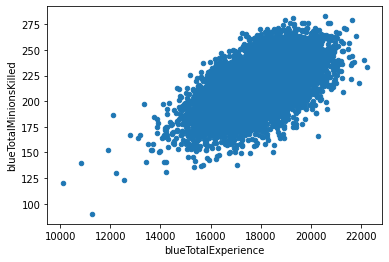

In [306]:
# Verificando a relação entre o total de experiência ganha o total minions derrotados em partida:
df.plot.scatter(x='blueTotalExperience',y='blueTotalMinionsKilled')

# Criando uma coluna com o valor de experiência obtido por minion derrotado em partida:
df['xp_minions'] = df['blueTotalExperience'] / df['blueTotalMinionsKilled']

<Axes: >

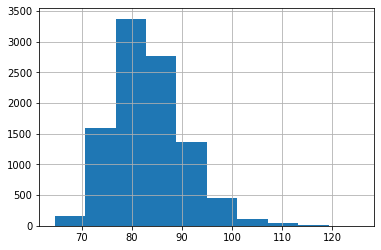

In [307]:
# Criando uma coluna com o valor de experiência obtido por minion derrotado em partida:
df['xp_minions'] = df['blueTotalExperience'] / df['blueTotalMinionsKilled']

# Verificar se a nova coluna é uma distribuição simétrica
# Nesse caso não será preciso normalizar.

df['xp_minions'].hist()

<Axes: >

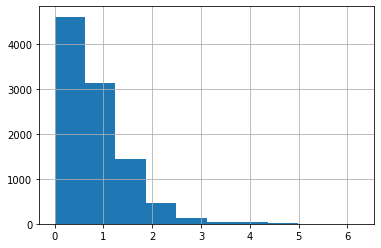

In [308]:
# cálculo do Z-Score Robusto
mad = abs(df['xp_minions'] - df['xp_minions'].median()).median()*(1/0.6745)
(abs(df['xp_minions']-df['xp_minions'].median())/mad).hist()


In [309]:
# Todos os valores ACIMA do valor ideal (OUTLIERS POSITIVOS)
print('Quantidade de registros que possuem Z-Score maior que 4: ',len(df[abs(df['xp_minions']-df['xp_minions'].median())/mad > 4]), 'linhas')

# Visualizando o dados que possuem Z-Score maior que 3:
df[abs(df['xp_minions']-df['xp_minions'].median())/mad > 4]

Quantidade de registros que possuem Z-Score maior que 4:  32 linhas


,vencedor,blueWardsPlaced_log,redWardsPlaced_log,blueWardsPlaced,redWardsPlaced,blueWins,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,...,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin,xp_minions
gameId,,,,,,,,,,,,,,,,,,,,,
4453038156,1,1.518514,1.230449,33,17,0,2,1,11,11,...,18200,7.0,19142,188,52,"(-14.0, 1585.5]",635,18.8,1820.0,117.878981
4524445302,0,1.255273,1.079181,18,12,1,1,0,12,9,...,16692,6.2,14884,181,40,"(-1596.0, -14.0]",-1054,18.1,1669.2,111.454545
4444096628,1,1.505150,1.146128,32,14,0,2,0,10,12,...,18626,7.0,18359,210,35,"(1585.5, 10830.0]",1634,21.0,1862.6,112.248322
4515929996,1,1.342423,1.230449,22,17,0,1,1,10,4,...,15674,6.6,17240,203,68,"(-1596.0, -14.0]",-577,20.3,1567.4,113.484076
4519070159,0,1.204120,1.113943,16,13,1,2,0,14,17,...,19549,7.0,17869,185,60,"(-14.0, 1585.5]",904,18.5,1954.9,113.100000
4522601475,0,0.903090,1.204120,8,16,1,0,1,6,5,...,17832,7.0,18307,268,51,"(1585.5, 10830.0]",-412,26.8,1783.2,112.089820
4519007166,0,1.278754,1.278754,19,19,1,2,1,8,9,...,18450,7.0,18525,231,42,"(1585.5, 10830.0]",1325,23.1,1845.0,115.436242
4445279107,1,1.204120,1.204120,16,16,0,3,0,6,14,...,18716,7.4,20066,207,44,"(1585.5, 10830.0]",3038,20.7,1871.6,110.571429
4520417782,0,1.000000,1.176091,10,15,1,3,0,12,6,...,16561,7.0,17331,200,48,"(-1596.0, -14.0]",-816,20.0,1656.1,114.854430


#### 2.4.4 Multivariado (Método Elliptic Envelope)

In [310]:
# Lendo novamente o dataset:
df = pd.read_csv("https://raw.githubusercontent.com/AndrelsOliveira/PES_Ciencia_Dados/main/high_diamond_ranked_10min.csv")
# Criando coluna vencedor:
df['vencedor'] = list(map(lambda x: 'Azul' if x == 1 else 'Vermelho', df['blueWins']))
# Usar a coluna gameId como Índice
df = df.set_index('gameId')
# Verificando o tipo dos dados
df.dtypes

blueWins                          int64
blueWardsPlaced                   int64
blueWardsDestroyed                int64
blueFirstBlood                    int64
blueKills                         int64
blueDeaths                        int64
blueAssists                       int64
blueEliteMonsters                 int64
blueDragons                       int64
blueHeralds                       int64
blueTowersDestroyed               int64
blueTotalGold                     int64
blueAvgLevel                    float64
blueTotalExperience               int64
blueTotalMinionsKilled            int64
blueTotalJungleMinionsKilled      int64
blueGoldDiff                      int64
blueExperienceDiff                int64
blueCSPerMin                    float64
blueGoldPerMin                  float64
redWardsPlaced                    int64
redWardsDestroyed                 int64
redFirstBlood                     int64
redKills                          int64
redDeaths                         int64


In [311]:
# Transformando as colunas tipo categoria em valores numéricos e criando códigos
df['vencedor'] = df['vencedor'].astype('category')
df['vencedor'] = df['vencedor'].cat.codes

In [312]:
detector = EllipticEnvelope(contamination=0.01)
detector.fit(df)

C:\Users\ALDOLIV\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\covariance\_robust_covariance.py:745: UserWarning: The covariance matrix associated to your dataset is not full rank
  warnings.warn(


EllipticEnvelope(contamination=0.01)

In [313]:
scores = detector.predict(df)
print(scores)

[1 1 1 ... 1 1 1]


In [314]:
df['outlier'] = scores
df.head()

,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,...,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin,vencedor,outlier
gameId,,,,,,,,,,,,,,,,,,,,,
4519157822,0,28,2,1,9,6,11,0,0,0,...,6.8,17047,197,55,-643,8,19.7,1656.7,1,1
4523371949,0,12,1,0,5,5,5,0,0,0,...,6.8,17438,240,52,2908,1173,24.0,1762.0,1,1
4521474530,0,15,0,0,7,11,4,1,1,0,...,6.8,17254,203,28,1172,1033,20.3,1728.5,1,1
4524384067,0,43,1,0,4,5,5,1,0,1,...,7.0,17961,235,47,1321,7,23.5,1647.8,1,1
4436033771,0,75,4,0,6,6,6,0,0,0,...,7.0,18313,225,67,1004,-230,22.5,1740.4,1,1


In [315]:
df = df[df['outlier'] != -1]
len(df)

9780

#### 2.4.5 Multivariado (Isolation Forest)

In [316]:
# Lendo novamente o dataset:
df = pd.read_csv("https://raw.githubusercontent.com/AndrelsOliveira/PES_Ciencia_Dados/main/high_diamond_ranked_10min.csv")
# Criando coluna vencedor:
df['vencedor'] = list(map(lambda x: 'Azul' if x == 1 else 'Vermelho', df['blueWins']))
# Usar a coluna gameId como Índice
df = df.set_index('gameId')
# Transformando as colunas tipo categoria em valores numéricos e criando códigos
df['vencedor'] = df['vencedor'].astype('category')
df['vencedor'] = df['vencedor'].cat.codes
# Verificando o tipo dos dados
df.dtypes

blueWins                          int64
blueWardsPlaced                   int64
blueWardsDestroyed                int64
blueFirstBlood                    int64
blueKills                         int64
blueDeaths                        int64
blueAssists                       int64
blueEliteMonsters                 int64
blueDragons                       int64
blueHeralds                       int64
blueTowersDestroyed               int64
blueTotalGold                     int64
blueAvgLevel                    float64
blueTotalExperience               int64
blueTotalMinionsKilled            int64
blueTotalJungleMinionsKilled      int64
blueGoldDiff                      int64
blueExperienceDiff                int64
blueCSPerMin                    float64
blueGoldPerMin                  float64
redWardsPlaced                    int64
redWardsDestroyed                 int64
redFirstBlood                     int64
redKills                          int64
redDeaths                         int64


In [317]:
rng = np.random.RandomState(42)
clf = IsolationForest(max_samples=100, random_state=rng)
clf.fit(df)

IsolationForest(max_samples=100,
                random_state=RandomState(MT19937) at 0x1D8A3C5EE40)

In [318]:
scores = clf.predict(df)
scores

array([ 1, -1,  1, ...,  1,  1,  1])

In [319]:
df['outlier'] = scores
anomalias = df[df['outlier'] == -1]
print('Quantidade de anomalias no dataset:',len(anomalias))

Quantidade de anomalias no dataset: 1853


## 3. Estatística Descritiva


In [320]:
# Lendo novamente o dataset:
df = pd.read_csv("https://raw.githubusercontent.com/AndrelsOliveira/PES_Ciencia_Dados/main/high_diamond_ranked_10min.csv")
# Criando coluna vencedor:
df['vencedor'] = list(map(lambda x: 'Azul' if x == 1 else 'Vermelho', df['blueWins']))
# Usar a coluna gameId como Índice
df = df.set_index('gameId')

# Criando coluna que identifica o firstblood:
df['FirstBlood'] = list(map(lambda x: 'Azul' if x == 1 else 'Vermelho', df['blueFirstBlood']))


In [321]:
# Analisando a mediana e média de experiência ganha pelo time VERMELHO, quando eles VENCEM a partida
media1 = df[df['vencedor'] == 'Vermelho']['redTotalExperience'].mean()
mediana1 = df[df['vencedor'] == 'Vermelho']['redTotalExperience'].median()
print('Experiência Time Vermelho - Vencedor da Partida:')
print('Média: ',media1)
print('Mediana :', mediana1)

# Analisando a mediana e média de experiência ganha pelo time VERMELHO, quando eles PERDEM a partida
media2 = df[df['vencedor'] == 'Azul']['redTotalExperience'].mean()
mediana2 = df[df['vencedor'] == 'Azul']['redTotalExperience'].median()
print('Experiência Time Vermelho - Derrota da Partida:')
print('Média: ',media2)
print('Mediana :', mediana2)

Experiência Time Vermelho - Vencedor da Partida:
Média:  18425.370579915136
Mediana : 18421.0
Experiência Time Vermelho - Derrota da Partida:
Média:  17496.303448275863
Mediana : 17542.0


In [322]:
# Analisando a relação média de experiência ganha pelo time AZUL ao VENCER a partida
media2 = df[df['vencedor'] == 'Azul']['blueTotalExperience'].mean()
mediana2 = df[df['vencedor'] == 'Azul']['blueTotalExperience'].median()
print('Experiência Time Azul - Vencedor da Partida:')
print('Média: ',media2)
print('Mediana :', mediana2)

# Analisando a relação média de experiência ganha pelo time AZUL ao PERDER a partida
media2 = df[df['vencedor'] == 'Vermelho']['blueTotalExperience'].mean()
mediana2 = df[df['vencedor'] == 'Vermelho']['blueTotalExperience'].median()
print('Experiência Time Vermelho - Derrotado na Partida:')
print('Média: ',media2)
print('Mediana :', mediana2)

Experiência Time Azul - Vencedor da Partida:
Média:  18404.57789046653
Mediana : 18407.5
Experiência Time Vermelho - Derrotado na Partida:
Média:  17453.47161042635
Mediana : 17511.0


In [323]:
# Analisando o ganho de experiência do time vermelho ao GANHAR a partida:
df[df['vencedor'] == 'Vermelho']['redTotalExperience'].describe()


count     4949.000000
mean     18425.370580
std       1073.888333
min      14029.000000
25%      17722.000000
50%      18421.000000
75%      19154.000000
max      22269.000000
Name: redTotalExperience, dtype: float64

<Axes: >

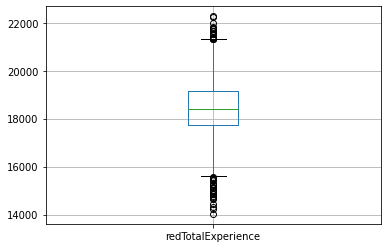

In [324]:
# Visualizando o boxplot da coluna de Experiência do time Vermelho ao vencer a partida. 
# É nítida a presença de outliers, tanto nos valores superiores quanto nos inferiores.
df[df['vencedor'] == 'Vermelho'].boxplot(column=['redTotalExperience'])

In [325]:
# Analisando o ganho de experiência do time vermelho ao GANHAR a partida E TER OBTIDO o First blood do jogo:
df[(df['vencedor'] == 'Vermelho') & (df['redFirstBlood'] == 1)]['redTotalExperience'].describe()

count     2949.000000
mean     18533.259749
std       1067.531451
min      14029.000000
25%      17823.000000
50%      18548.000000
75%      19275.000000
max      22269.000000
Name: redTotalExperience, dtype: float64

<Axes: >

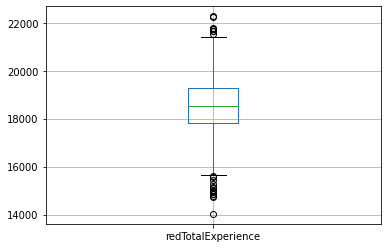

In [326]:
# Verificando novamente o boxplot da experiência ganha com as condições: ter ganho a partida e conseguido o first blood:
df[(df['vencedor'] == 'Vermelho') & (df['redFirstBlood'] == 1)].boxplot(column=['redTotalExperience'])

In [327]:
# CRiando um quadro resumo com a experiência média dos times analisando também quem fez o Firtsblood em jogo:
df.groupby(['vencedor','FirstBlood'])['redTotalExperience'].mean()

vencedor  FirstBlood
Azul      Azul          17371.503850
          Vermelho      17688.159547
Vermelho  Azul          18266.288000
          Vermelho      18533.259749
Name: redTotalExperience, dtype: float64

Conforme pode ser observado na linha cima:  
Contrariando a lógica do jogo, o time Azul ganha em média mais experiência nas partidas em que o FirstBlood é do time inimigo.

In [328]:
# São 41 colunas no total e para facilitar a análise, serão analizados os dados de jogo do time VERMELHO, portanto, utilizar apenas as inforamações do time VERMELHO.

df_vermelho = pd.read_csv("https://raw.githubusercontent.com/AndrelsOliveira/PES_Ciencia_Dados/main/high_diamond_ranked_10min.csv")
df_vermelho['vencedor'] = list(map(lambda x: 'Azul' if x == 1 else 'Vermelho', df['blueWins']))

df_vermelho = df_vermelho[['vencedor', 'redWardsPlaced', 'redWardsDestroyed',
       'redFirstBlood', 'redKills', 'redDeaths', 'redAssists',
       'redEliteMonsters', 'redDragons', 'redHeralds', 'redTowersDestroyed',
       'redTotalGold', 'redAvgLevel', 'redTotalExperience',
       'redTotalMinionsKilled', 'redTotalJungleMinionsKilled', 'redGoldDiff',
       'redExperienceDiff', 'redCSPerMin', 'redGoldPerMin']]

# ANALISANDO A COVARIANCIA
df_vermelho[df_vermelho['vencedor'] == 'Vermelho'].cov()

,redWardsPlaced,redWardsDestroyed,redFirstBlood,redKills,redDeaths,redAssists,redEliteMonsters,redDragons,redHeralds,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
redWardsPlaced,351.396904,0.902413,0.091957,-0.024413,-1.461796,1.164863,0.484905,0.254766,0.230139,-0.096503,-3.416396e+02,0.117347,4.929857e+02,-17.424734,1.176275,-2.619061e+02,3.188323e+02,-1.742473,-34.163956
redWardsDestroyed,0.902413,4.580535,0.011876,-0.022243,-0.266258,0.252635,0.019736,0.026093,-0.006358,-0.001538,4.982530e+01,0.015320,4.546583e+01,3.689053,-0.786827,1.571033e+02,7.014767e+01,0.368905,4.982530
redFirstBlood,0.091957,0.011876,0.240856,0.253693,-0.315022,0.276701,0.034422,0.022863,0.011558,0.007667,1.586517e+02,0.015203,6.430177e+01,1.123116,-0.026708,3.381395e+02,1.343308e+02,0.112312,15.865170
redKills,-0.024413,-0.022243,0.253693,8.594966,0.921904,9.542926,0.156252,0.100864,0.055388,0.115504,3.641517e+03,0.307202,1.290083e+03,-8.622861,-4.173429,3.842970e+03,2.652332e+03,-0.862286,364.151730
redDeaths,-1.461796,-0.266258,-0.315022,0.921904,6.828364,0.835815,-0.276317,-0.200389,-0.075928,-0.051359,-8.805350e+01,-0.216221,-9.595295e+02,-21.684481,-4.705324,-3.045732e+03,-2.084575e+03,-2.168448,-8.805350
redAssists,1.164863,0.252635,0.276701,9.542926,0.835815,17.482470,0.178924,0.173512,0.005412,0.105816,4.168850e+03,0.226848,8.539224e+02,-15.175410,-7.284084,4.338393e+03,2.471040e+03,-1.517541,416.884958
redEliteMonsters,0.484905,0.019736,0.034422,0.156252,-0.276317,0.178924,0.415832,0.254128,0.161705,0.024944,1.309628e+02,0.026867,1.193935e+02,1.049602,1.318096,2.545536e+02,1.907370e+02,0.104960,13.096276
redDragons,0.254766,0.026093,0.022863,0.100864,-0.200389,0.173512,0.254128,0.249792,0.004335,-0.000648,5.627665e+01,0.015988,6.878063e+01,0.497144,1.001475,1.385626e+02,9.888319e+01,0.049714,5.627665
redHeralds,0.230139,-0.006358,0.011558,0.055388,-0.075928,0.005412,0.161705,0.004335,0.157369,0.025592,7.468611e+01,0.010879,5.061283e+01,0.552458,0.316621,1.159910e+02,9.185384e+01,0.055246,7.468611
redTowersDestroyed,-0.096503,-0.001538,0.007667,0.115504,-0.051359,0.105816,0.024944,-0.000648,0.025592,0.070087,1.392768e+02,0.007929,3.511700e+01,0.537497,-0.018664,1.834289e+02,9.359958e+01,0.053750,13.927676


## 4. Teste de Hipótese

<Axes: >

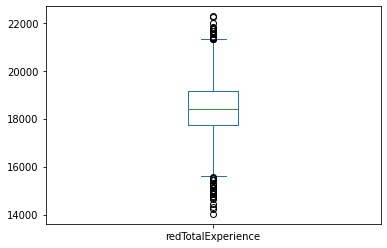

In [337]:
# Lendo novamente o dataset:
df = pd.read_csv("https://raw.githubusercontent.com/AndrelsOliveira/PES_Ciencia_Dados/main/high_diamond_ranked_10min.csv")
# Criando coluna vencedor:
df['vencedor'] = list(map(lambda x: 'Azul' if x == 1 else 'Vermelho', df['blueWins']))

# Criando coluna que identifica o firstblood:
df['FirstBlood'] = list(map(lambda x: 'Azul' if x == 1 else 'Vermelho', df['blueFirstBlood']))

df[df['vencedor']=='Vermelho']['redTotalExperience'].plot(kind='box')

#COMO COLOCAR AS DUAS INFORMAÇÔES NO MESMO PLOT?

<Axes: ylabel='Frequency'>

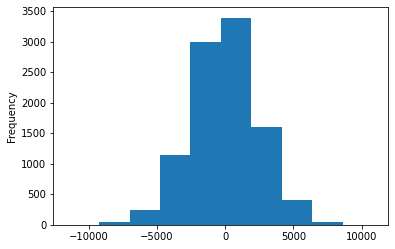

In [338]:
# teste de hipótese, verificar se há diferença entre o total de recursos obtido pelo time vermelho e time azul.
# HIPOTESE NULA =  São iguais
# HIPOTESE ALTERNATIVA = SÃO DIFERENTES

# Verificar se a diferença é uma curva gausiana:
df['diferenca'] = df['redTotalGold'] - df['blueTotalGold']
df['diferenca'].plot(kind='hist')

In [339]:
# Teste de hipótese para verificar se a curva é normal - Shapiro-Wilk
# Hipótese nula =  a curva é normal.
# Hipótese alternativa = a curva é diferente

stats.shapiro(df['diferenca'])

# para rejeitar a hipótese nula, o valor crítico precisa ser abaixo de 0.05
# Com o p-value de 1.2617 não é possível rejeitar a hipótese nula, portanto a curva é de fato normal

C:\Users\ALDOLIV\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.9990203976631165, pvalue=1.261766465177061e-05)

In [340]:
# Após confirmar que a coluna 'diferenca' é de fato uma curva normal, prosseguir com o teste (T-Teste):
stats.ttest_rel(df['redTotalGold'], df['blueTotalGold'])

# para rejeitar a hipótese nula, o valor crítico precisa ser abaixo de 0.05
# Com o p-value de 0.5592 não é possível rejeitar a hipótese nula, portanto não há diferença entre o total de recursos obtido pelo time vermelho e azul

TtestResult(statistic=-0.5839625311337198, pvalue=0.5592588554007278, df=9878)

In [341]:
# Verificando se as amostras seguem uma distribuição normal para identificar qual método será utilizado:
stats.shapiro(df[df['vencedor']=='Azul']['blueTotalGold'])
# SIM, SEguem uma gausiana.

ShapiroResult(statistic=0.985221266746521, pvalue=2.585854492878268e-22)

In [342]:
stats.shapiro(df[df['vencedor']=='Vermelho']['redTotalGold'])

ShapiroResult(statistic=0.9897962212562561, pvalue=1.922597699783526e-18)

<Axes: >

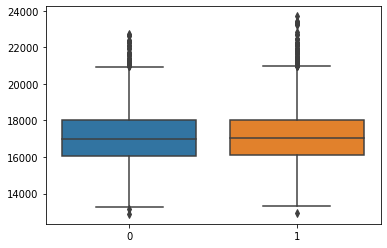

In [343]:
# Verificando se as medianas são parecidas:

vermelho = df[df['vencedor']=='Vermelho']['redTotalGold']
azul = df[df['vencedor']=='Azul']['blueTotalGold']
sns.boxplot(data=[vermelho,azul])

In [344]:
# TESTE PAREADOS: Wilcoxon signed-rank Test
# Verificando o total de Experiência dos times apenas quando estes são vencedores:

stats.mannwhitneyu(df[df['vencedor']='Azul']['blueTotalExperience'],df[df['vencedor']=='Vermelho']['redTotalExperience'])

SyntaxError: invalid syntax (Temp/ipykernel_8948/1501109776.py, line 4)